$$ 
max\ 2x_1 + 3x_2 \\
s.t.\ 3x_1 + 4x_2 <= 10 \\
x_1, x_2 >0 \\
x_1, x_2 \subset\ \mathbb{R}
$$ 

# 1. Import libraries

In [119]:
import pyomo.environ as pe
import numpy as np
import matplotlib.pyplot as plt

# 2. Visualise simple problem

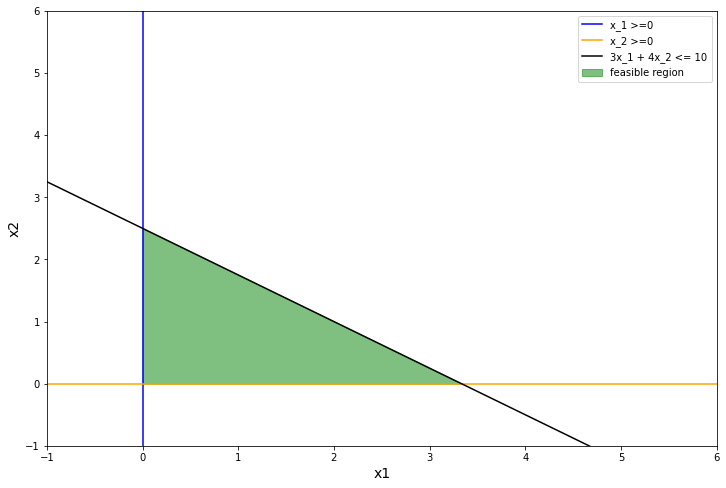

In [122]:
fig= plt.figure(figsize=(12, 8))

# draw constraints
# 𝑥1,𝑥2>0
plt.axvline(x=0, c="blue", label="x_1 >=0")
plt.axhline(y=0, c="orange", label="x_2 >=0")
# constraint 3𝑥_1+4𝑥_2<=10
x1 = np.arange(-1, 6, 0.1)
x2 = [(10-3*x)/4 for x in x1]
plt.plot(x1, x2, c="black", label="3x_1 + 4x_2 <= 10")

# traingle of possible solutions
plt.fill_between([0, 0, 10/3], [0, 10/4, 0], color="green", alpha=0.5, label="Feasible region")

# plot config
plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.xlabel("x1", size=14)
plt.ylabel("x2", size=14)
plt.legend()

plt.show()

# 3. Formulate problem

## 3.1 Define model, objective and constraints

In [150]:
# instantiate a concrete model
model = pe.ConcreteModel()

# create variables (the ones we want to find a solution for)
model.x1 = pe.Var(domain=pe.NonNegativeReals)
model.x2 = pe.Var(domain=pe.NonNegativeReals)

# define objective
model.OBJ = pe.Objective(expr=2*model.x1 + 3*model.x2, sense=pe.maximize)

# define constraints
model.Constraint1 = pe.Constraint(expr=3*model.x1 + 4*model.x2 <= 10)

In [151]:
print("Defined model")
print("=" * 20)
model.pprint()

Defined model
2 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

1 Objective Declarations
    OBJ : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 2*x1 + 3*x2

1 Constraint Declarations
    Constraint1 : Size=1, Index=None, Active=True
        Key  : Lower : Body        : Upper : Active
        None :  -Inf : 3*x1 + 4*x2 :  10.0 :   True

4 Declarations: x1 x2 OBJ Constraint1


## 3.2 Solve model

In [152]:
pe.SolverFactory("glpk").solve(model)

{'Problem': [{'Name': 'unknown', 'Lower bound': 7.5, 'Upper bound': 7.5, 'Number of objectives': 1, 'Number of constraints': 2, 'Number of variables': 3, 'Number of nonzeros': 3, 'Sense': 'maximize'}], 'Solver': [{'Status': 'ok', 'Termination condition': 'optimal', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': 0, 'Number of created subproblems': 0}}, 'Error rc': 0, 'Time': 0.012261152267456055}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [153]:
print("\n")
print("Solution")
print("="*20)
model.x1.display()
model.x2.display()



Solution
x1 : Size=1, Index=None
    Key  : Lower : Value : Upper : Fixed : Stale : Domain
    None :     0 :   0.0 :  None : False : False : NonNegativeReals
x2 : Size=1, Index=None
    Key  : Lower : Value : Upper : Fixed : Stale : Domain
    None :     0 :   2.5 :  None : False : False : NonNegativeReals


# 4. Visualise solution

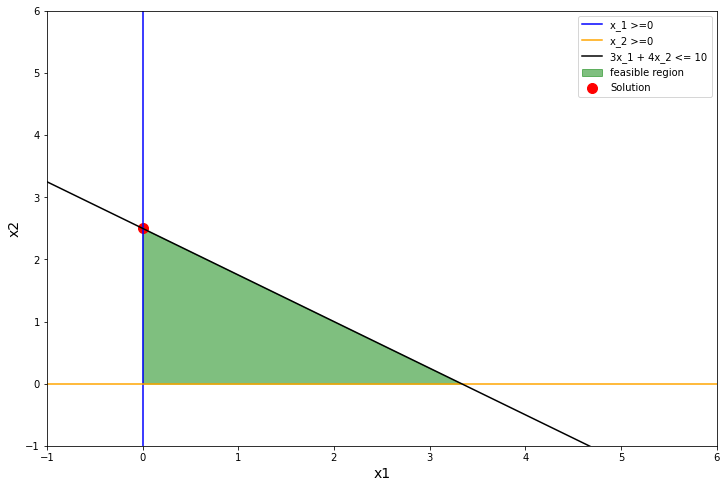

In [154]:
fig= plt.figure(figsize=(12, 8))

# draw constraints
# 𝑥1,𝑥2>0
plt.axvline(x=0, c="blue", label="x_1 >=0")
plt.axhline(y=0, c="orange", label="x_2 >=0")
# constraint 3𝑥_1+4𝑥_2<=10
x1 = np.arange(-1, 6, 0.1)
x2 = [(10-3*x)/4 for x in x1]
plt.plot(x1, x2, c="black", label="3x_1 + 4x_2 <= 10")

# traingle of possible solutions
plt.fill_between([0, 0, 10/3], [0, 10/4, 0], color="green", alpha=0.5, label="Feasible region")

# plot solution
plt.scatter(x=pe.value(model.x1), y=pe.value(model.x2), c="red", s=100, label="Solution")

# plot config
plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.xlabel("x1", size=14)
plt.ylabel("x2", size=14)
plt.legend()
plt.show()

# 5. Same problem using Sets

* We don't need to declare each variable on its own
* Instead, we can use pyomo sets to define what shape the Var variable (optimised solutions) should have
* pyomo Var, Param variables can be sliced similarly to numpy arrays

In [156]:
# instantiate a concrete model
model = pe.ConcreteModel()

# define sets
model.dims = pe.Set(initialize=[1, 2], domain=pe.NonNegativeIntegers)

# create variables (the ones we want to find a solution for)
model.x = pe.Var(model.dims, domain=pe.NonNegativeReals)

# define objective
model.OBJ = pe.Objective(expr=2*model.x[1] + 3*model.x[2], sense=pe.maximize)

# define constraints
model.Constraint1 = pe.Constraint(expr=3*model.x[1] + 4*model.x[2] <= 10)

In [157]:
print("Defined model")
print("=" * 20)
model.pprint()

Defined model
1 Set Declarations
    dims : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain              : Size : Members
        None :     1 : NonNegativeIntegers :    2 : {1, 2}

1 Var Declarations
    x : Size=2, Index=dims
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :  None :  None : False :  True : NonNegativeReals
          2 :     0 :  None :  None : False :  True : NonNegativeReals

1 Objective Declarations
    OBJ : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 2*x[1] + 3*x[2]

1 Constraint Declarations
    Constraint1 : Size=1, Index=None, Active=True
        Key  : Lower : Body            : Upper : Active
        None :  -Inf : 3*x[1] + 4*x[2] :  10.0 :   True

4 Declarations: dims x OBJ Constraint1


In [158]:
pe.SolverFactory("glpk").solve(model)

{'Problem': [{'Name': 'unknown', 'Lower bound': 7.5, 'Upper bound': 7.5, 'Number of objectives': 1, 'Number of constraints': 2, 'Number of variables': 3, 'Number of nonzeros': 3, 'Sense': 'maximize'}], 'Solver': [{'Status': 'ok', 'Termination condition': 'optimal', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': 0, 'Number of created subproblems': 0}}, 'Error rc': 0, 'Time': 0.012325048446655273}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [159]:
model.x.display()

x : Size=2, Index=dims
    Key : Lower : Value : Upper : Fixed : Stale : Domain
      1 :     0 :   0.0 :  None : False : False : NonNegativeReals
      2 :     0 :   2.5 :  None : False : False : NonNegativeReals


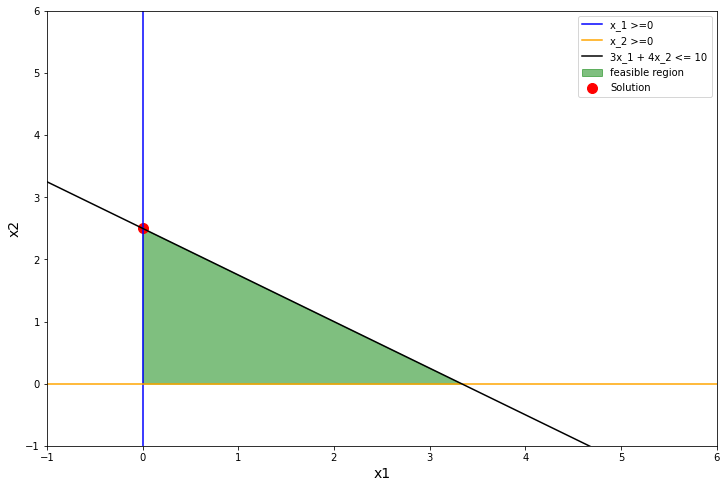

In [160]:
fig= plt.figure(figsize=(12, 8))

# draw constraints
# 𝑥1,𝑥2>0
plt.axvline(x=0, c="blue", label="x_1 >=0")
plt.axhline(y=0, c="orange", label="x_2 >=0")
# constraint 3𝑥_1+4𝑥_2<=10
x1 = np.arange(-1, 6, 0.1)
x2 = [(10-3*x)/4 for x in x1]
plt.plot(x1, x2, c="black", label="3x_1 + 4x_2 <= 10")

# traingle of possible solutions
plt.fill_between([0, 0, 10/3], [0, 10/4, 0], color="green", alpha=0.5, label="Feasible region")

# plot solution
plt.scatter(x=pe.value(model.x[1]), y=pe.value(model.x[2]), c="red", s=100, label="Solution")

# plot config
plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.xlabel("x1", size=14)
plt.ylabel("x2", size=14)
plt.legend()
plt.show()